C:\Users\ayush\AppData\Local\Temp\ipykernel_15800\4224972224.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ayush\AppData\Local\Temp\ipykernel_15800\4224972224.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


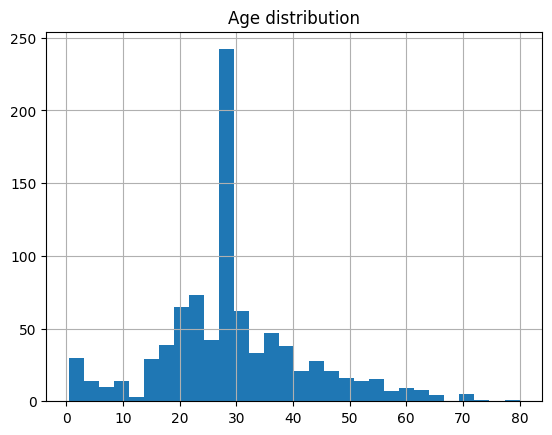

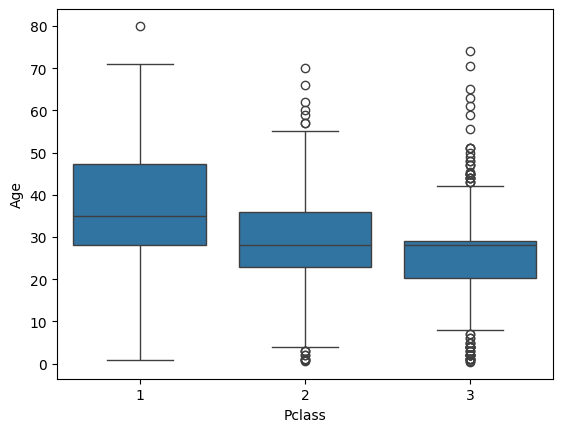

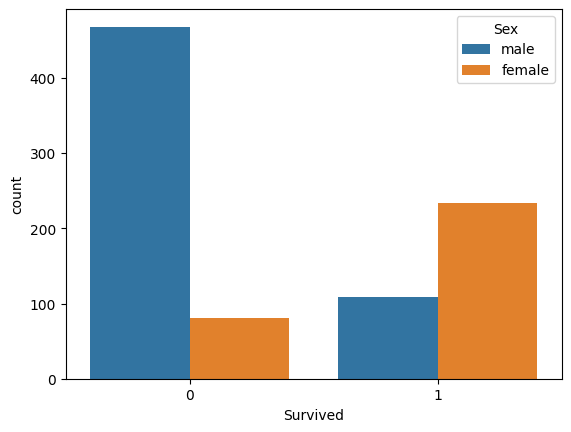

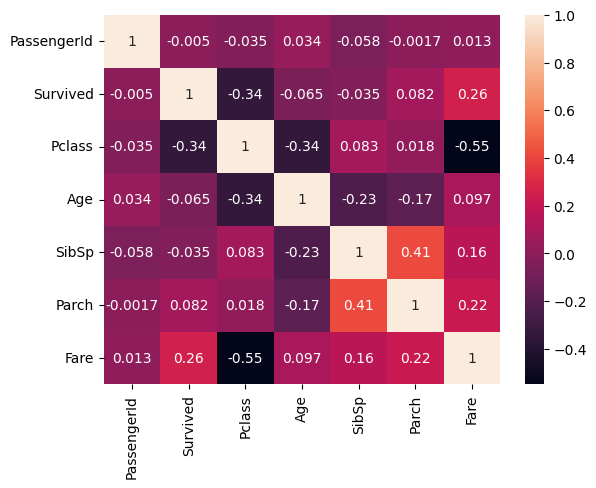

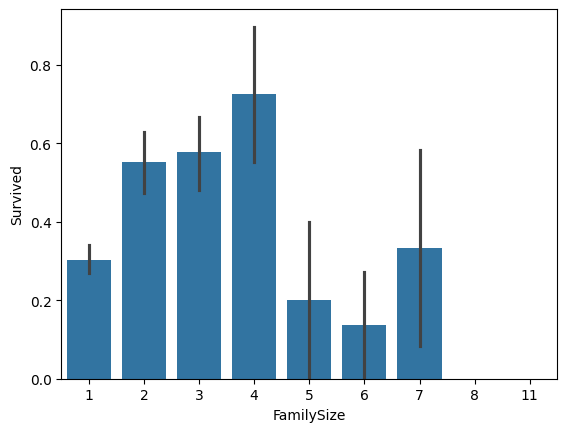

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("../data/titanic.csv")
df.head()
# Check missing values
df.isnull().sum()

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many nulls)
df.drop(columns='Cabin', inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

# Check types
df.dtypes
df.describe()
df.info()
df['Survived'].value_counts()
# Histogram
df['Age'].hist(bins=30)
plt.title('Age distribution')
plt.show()

# Box plot
sns.boxplot(x='Pclass', y='Age', data=df)
plt.show()

# Count plot
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()
df.groupby('Pclass')['Survived'].mean()
df.groupby('Sex')['Survived'].mean()
# Create new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.head()

sns.barplot(x='FamilySize', y='Survived', data=df)
plt.show()